In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def f(t): return (t-1)**3 + 0.5 * math.exp(t)

In [3]:
s = np.linspace(0,1,100)
g = (s-1)**3 + 0.5 * 2.7182818284**(s)

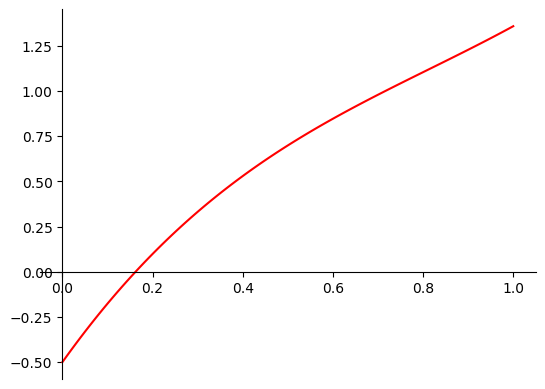

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(s,g, 'r')
plt.show()

Задамо 10 рівновіддалених вузлів:


In [5]:
x_0 = 0
x_1 = h = 0.1
x = [x_0, x_1]
x_n = x_1

for k in range(0, 8):  
    x_N = x_n + h 
    x_n = x_N
    x.append(x_N)

print(x)

[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]


In [8]:
y = []
for i in range(0, len(x)):
    y.append(f(x[i]))
             
print(y)

[-0.5, -0.17641454096217624, 0.0987013790800848, 0.3319294037880017, 0.5299123488206352, 0.6993606353500641, 0.8470594001952544, 0.9798763537352383, 1.1047704642462337, 1.2288015555784746]


Інтерполяційний поліном Лагранжа:

In [9]:
def lagrange_pol(x, y, X_n):
    m = len(x)
    n = m - 1
    Y_n = 0

    for i in range(n+1):
        p = 1
        for j in range(n+1):
            if j!=i:
                p*= (X_n-x[j])/(x[i]-x[j])
        Y_n += y[i]*p
        
    return Y_n

X_n = np.arange(0, 1, .01)
Y_r = []

for i in range(0, len(X_n)):
    Y_r.append(lagrange_pol(x, y, X_n[i]))

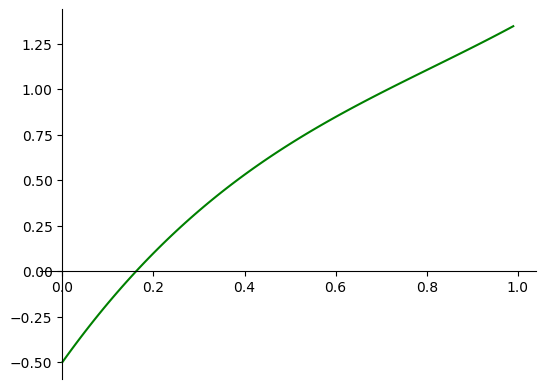

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(X_n,Y_r, 'g')
plt.show()

In [11]:
def lagrange_pol_print(x, y):
    m = len(x)
    n = m - 1
    Y_n = ""

    for i in range(n+1):
        Y_n += f"+({y[i]:.1f})"
        for j in range(n+1):
            if j!=i:
                Y_n +=f"*(x-({x[j]:.1f}))/({(x[i]-x[j]):.1f})"
        
    return Y_n

print(f"L_n = {lagrange_pol_print(x, y)}")

L_n = +(-0.5)*(x-(0.1))/(-0.1)*(x-(0.2))/(-0.2)*(x-(0.3))/(-0.3)*(x-(0.4))/(-0.4)*(x-(0.5))/(-0.5)*(x-(0.6))/(-0.6)*(x-(0.7))/(-0.7)*(x-(0.8))/(-0.8)*(x-(0.9))/(-0.9)+(-0.2)*(x-(0.0))/(0.1)*(x-(0.2))/(-0.1)*(x-(0.3))/(-0.2)*(x-(0.4))/(-0.3)*(x-(0.5))/(-0.4)*(x-(0.6))/(-0.5)*(x-(0.7))/(-0.6)*(x-(0.8))/(-0.7)*(x-(0.9))/(-0.8)+(0.1)*(x-(0.0))/(0.2)*(x-(0.1))/(0.1)*(x-(0.3))/(-0.1)*(x-(0.4))/(-0.2)*(x-(0.5))/(-0.3)*(x-(0.6))/(-0.4)*(x-(0.7))/(-0.5)*(x-(0.8))/(-0.6)*(x-(0.9))/(-0.7)+(0.3)*(x-(0.0))/(0.3)*(x-(0.1))/(0.2)*(x-(0.2))/(0.1)*(x-(0.4))/(-0.1)*(x-(0.5))/(-0.2)*(x-(0.6))/(-0.3)*(x-(0.7))/(-0.4)*(x-(0.8))/(-0.5)*(x-(0.9))/(-0.6)+(0.5)*(x-(0.0))/(0.4)*(x-(0.1))/(0.3)*(x-(0.2))/(0.2)*(x-(0.3))/(0.1)*(x-(0.5))/(-0.1)*(x-(0.6))/(-0.2)*(x-(0.7))/(-0.3)*(x-(0.8))/(-0.4)*(x-(0.9))/(-0.5)+(0.7)*(x-(0.0))/(0.5)*(x-(0.1))/(0.4)*(x-(0.2))/(0.3)*(x-(0.3))/(0.2)*(x-(0.4))/(0.1)*(x-(0.6))/(-0.1)*(x-(0.7))/(-0.2)*(x-(0.8))/(-0.3)*(x-(0.9))/(-0.4)+(0.8)*(x-(0.0))/(0.6)*(x-(0.1))/(0.5)*(x-(0.2))/(0.4

In [13]:
from scipy.optimize import fsolve
def L_n(x): return +(-0.5)*(x-(0.1))/(-0.1)*(x-(0.2))/(-0.2)*(x-(0.3))/(-0.3)*(x-(0.4))/(-0.4)*(x-(0.5))/(-0.5)*(x-(0.6))/(-0.6)*(x-(0.7))/(-0.7)*(x-(0.8))/(-0.8)*(x-(0.9))/(-0.9)+(-0.2)*(x-(0.0))/(0.1)*(x-(0.2))/(-0.1)*(x-(0.3))/(-0.2)*(x-(0.4))/(-0.3)*(x-(0.5))/(-0.4)*(x-(0.6))/(-0.5)*(x-(0.7))/(-0.6)*(x-(0.8))/(-0.7)*(x-(0.9))/(-0.8)+(0.1)*(x-(0.0))/(0.2)*(x-(0.1))/(0.1)*(x-(0.3))/(-0.1)*(x-(0.4))/(-0.2)*(x-(0.5))/(-0.3)*(x-(0.6))/(-0.4)*(x-(0.7))/(-0.5)*(x-(0.8))/(-0.6)*(x-(0.9))/(-0.7)+(0.3)*(x-(0.0))/(0.3)*(x-(0.1))/(0.2)*(x-(0.2))/(0.1)*(x-(0.4))/(-0.1)*(x-(0.5))/(-0.2)*(x-(0.6))/(-0.3)*(x-(0.7))/(-0.4)*(x-(0.8))/(-0.5)*(x-(0.9))/(-0.6)+(0.5)*(x-(0.0))/(0.4)*(x-(0.1))/(0.3)*(x-(0.2))/(0.2)*(x-(0.3))/(0.1)*(x-(0.5))/(-0.1)*(x-(0.6))/(-0.2)*(x-(0.7))/(-0.3)*(x-(0.8))/(-0.4)*(x-(0.9))/(-0.5)+(0.7)*(x-(0.0))/(0.5)*(x-(0.1))/(0.4)*(x-(0.2))/(0.3)*(x-(0.3))/(0.2)*(x-(0.4))/(0.1)*(x-(0.6))/(-0.1)*(x-(0.7))/(-0.2)*(x-(0.8))/(-0.3)*(x-(0.9))/(-0.4)+(0.8)*(x-(0.0))/(0.6)*(x-(0.1))/(0.5)*(x-(0.2))/(0.4)*(x-(0.3))/(0.3)*(x-(0.4))/(0.2)*(x-(0.5))/(0.1)*(x-(0.7))/(-0.1)*(x-(0.8))/(-0.2)*(x-(0.9))/(-0.3)+(1.0)*(x-(0.0))/(0.7)*(x-(0.1))/(0.6)*(x-(0.2))/(0.5)*(x-(0.3))/(0.4)*(x-(0.4))/(0.3)*(x-(0.5))/(0.2)*(x-(0.6))/(0.1)*(x-(0.8))/(-0.1)*(x-(0.9))/(-0.2)+(1.1)*(x-(0.0))/(0.8)*(x-(0.1))/(0.7)*(x-(0.2))/(0.6)*(x-(0.3))/(0.5)*(x-(0.4))/(0.4)*(x-(0.5))/(0.3)*(x-(0.6))/(0.2)*(x-(0.7))/(0.1)*(x-(0.9))/(-0.1)+(1.2)*(x-(0.0))/(0.9)*(x-(0.1))/(0.8)*(x-(0.2))/(0.7)*(x-(0.3))/(0.6)*(x-(0.4))/(0.5)*(x-(0.5))/(0.4)*(x-(0.6))/(0.3)*(x-(0.7))/(0.2)*(x-(0.8))/(0.1)
print('Корінь, знайдений за допомогою методу прямої інтерполяції x*=', fsolve(L_n, 0)[0])

<class 'IndexError'>: index 1 is out of bounds for axis 0 with size 1